<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Introduction:
        </span>
    </font>
</h3>
<p>
    <span style='font-family:Georgia'>
        Audible is a platform offering a wide range of audio content including audiobooks, podcasts, and other spoken-word entertainment. With the increasing popularity of audiobooks and the convenience they offer, understanding the various factors that influence the price of audio content is crucial. This analysis delves into the Audible dataset to explore and uncover patterns, trends, and relationships within the data. By examining elements such as release dates, languages, ratings, and listening durations, we aim to gain comprehensive insights into the pricing strategies and market dynamics of audio content.
    </span>
</p>

<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Business Objectives:
        </span>
    </font>
</h3>
<p>
    <span style='font-family:Georgia'>
        The primary business objectives of this analysis are:
    </span>
</p>
<ul>
    <li>
        <span style='font-family:Georgia'>
        <b>Identify Key Drivers:</b> To determine the main factors influencing the price of audio content on the Audible platform. This includes analyzing various attributes such as language, rating, duration, and release date to understand their impact on pricing.
        </span>
    </li>
    <li>
        <span style='font-family:Georgia'>
        <b>Predictive Modeling:</b> To develop predictive models that can accurately forecast the price of new audio content based on historical data and identified key drivers. This will aid in strategic pricing decisions and competitive market positioning.
        </span>
    </li>
</ul>
<p>
    <span style='font-family:Georgia'>
        By achieving these objectives, we aim to enhance the decision-making process, optimize pricing strategies, and ultimately improve profitability and customer satisfaction on the Audible platform. Understanding these dynamics will also provide valuable insights for content creators and marketers in tailoring their offerings to meet market demands effectively.
    </span>
</p>

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Requirments: </b><br>
        <ol>
            <li><b>pandas</b>  ==  2.2.2 </li>
            <li><b>numpy</b>  ==  1.26.3 </li>
            <li><b>matplotlib</b>  ==  3.8.3 </li>
            <li><b>seaborn</b>  ==   0.13.2 </li>
            <li><b>plotly</b>  ==   5.18.0 </li>
        </ol>
    </span>    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pickle

plt.style.use('seaborn-v0_8-darkgrid')
plt.style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Supress Warnings:
            </span>   
        </font>    
</h3>

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [3]:
df = pickle.load(open(r"audible_cleaned.pkl","rb"))

In [4]:
data = df.copy()

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

In [5]:
data.head()


name           author  \
0                  Geronimo Stilton #11 & #12  GeronimoStilton   
1                            The Burning Maze      RickRiordan   
2                                The Deep End       JeffKinney   
3                        Daughter of the Deep      RickRiordan   
4  The Lightning Thief: Percy Jackson, Book 1      RickRiordan   

         narrator releasedate language  price  rating_stars  time_mins  \
0      BillLobely  2008-08-04  English  468.0           5.0        140   
1   RobbieDaymond  2018-05-01  English  820.0           4.5        788   
2      DanRussell  2020-11-06  English  410.0           4.5        123   
3  SoneelaNankani  2021-10-05  English  615.0           4.5        676   
4  JesseBernstein  2010-01-13  English  820.0           4.5        600   

   rating_indiactor  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

<a id="shape"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.1 shape and size
            </span>   
        </font>    
</h4>

In [6]:
# Database dimension
print("Database dimension     :",data.shape)
#Database size
print("Database size -         :",data.size)

Database dimension     : (87419, 9)
Database size -         : 786771


<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.2 info
            </span>   
        </font>    
</h4>

In [7]:
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Index: 87419 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              87419 non-null  object        
 1   author            87419 non-null  object        
 2   narrator          87419 non-null  object        
 3   releasedate       87419 non-null  datetime64[ns]
 4   language          87419 non-null  object        
 5   price             87419 non-null  float64       
 6   rating_stars      15032 non-null  float64       
 7   time_mins         87419 non-null  int32         
 8   rating_indiactor  87419 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 6.0+ MB


<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.3 describe
            </span>   
        </font>    
</h4>

In [8]:
data.describe(include='all').transpose()

count unique                             top   freq  \
name                87419  82732                  The Art of War     20   
author              87419  48274  Shi Dao Ya Hong ,Shi Qiao You     874   
narrator            87419  29588                       anonymous   1034   
releasedate         87419    NaN                             NaN    NaN   
language            87419     36                         English  61828   
price             87419.0    NaN                             NaN    NaN   
rating_stars      15032.0    NaN                             NaN    NaN   
time_mins         87419.0    NaN                             NaN    NaN   
rating_indiactor  87419.0    NaN                             NaN    NaN   

                                           mean                  min  \
name                                        NaN                  NaN   
author                                      NaN                  NaN   
narrator                                    NaN                  NaN   
releasedate       2018-06-24 04:33:58.129010944  1998-12-27 00:00:00   
language                                    NaN                  NaN   
price                                558.992918                  0.0   
rating_stars                           4.456759                  1.0   
time_mins                             417.55234                  1.0   
rating_indiactor                       0.171953                  0.0   

                                  25%                  50%  \
name                              NaN                  NaN   
author                            NaN                  NaN   
narrator                          NaN                  NaN   
releasedate       2016-09-06 00:00:00  2020-02-06 00:00:00   
language                          NaN                  NaN   
price                           268.0                585.0   
rating_stars                      4.0                  4.5   
time_mins                       142.0                386.0   
rating_indiactor                  0.0                  0.0   

                                  75%                  max         std  
name                              NaN                  NaN         NaN  
author                            NaN                  NaN         NaN  
narrator                          NaN                  NaN         NaN  
releasedate       2021-08-17 00:00:00  2025-11-14 00:00:00         NaN  
language                          NaN                  NaN         NaN  
price                           755.0               7198.0  336.063663  
rating_stars                      5.0                  5.0    0.724758  
time_mins                       584.0               8595.0  364.617774  
rating_indiactor                  0.0                  1.0    0.377342

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.4 types
            </span>   
        </font>    
</h4>

In [5]:
categorical_columns = ['language', 'rating_indiactor']

numerical_columns = ['price', 'rating_stars', 'time_mins']

mixed = ['name', 'author', 'narrator']

date = ['releasedate']

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.5 duplicated
            </span>   
        </font>    
</h4>

In [11]:
data['name'].nunique()

82732

In [15]:
data['name'].duplicated().sum()

4687

In [6]:
data.drop_duplicates(subset = 'name', keep = 'last', inplace = True)

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.6 missing
            </span>   
        </font>    
</h4>

In [7]:
def check_missing(df):
    X = (df.isnull().sum() / df.shape[0] ).mul(100).round(2).sort_values(ascending=False).reset_index().rename(columns={'index':'feature',0:'missing_percentage'})
    return X[X['missing_percentage']>0]


check_missing(data)

feature  missing_percentage
0  rating_stars               83.38

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>rating_stars contains 83.38% missing values
    </span>    
</div>


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Analyzing the data
            </span>   
        </font>    
</h2>


<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Steps of doing Univariate Analysis on Numerical columns:
        </span>
    </font>
</h3>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def outliers_detect(column):
    # Calculate the first quartile (Q1)
    Q1 = column.quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = column.quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    if outliers.empty:
        return 0
    else:
        return len(outliers)

def univariate_num(df, target_col, bin=20, hist_color=None, kde_color=None, box_color=None, figsize=(20, 12)):
    # Separate data into premium and non-premium
    data = df.copy()

    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=target_col,  bins=bin, stat='density', color=hist_color)
    sns.kdeplot(data=data, x=target_col, color=kde_color)
    plt.title(f'Histogram - {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    sns.boxplot(data=data, x=target_col,  color=box_color, orient='h')
    plt.title(f'Box Plot - {target_col}')
    plt.xlabel(target_col)
    
    outliers = outliers_detect(data[target_col])
    print(f"Skewness of {target_col}: ", data[target_col].skew())
    print(f"Kurtosis of {target_col}: ", data[target_col].kurt() + 3)
    print(f"Outliers in {target_col}: ", outliers)
    print()

    plt.tight_layout()
    plt.show()

    print('\n'*4)

In [21]:
print(numerical_columns)

['price', 'rating_stars', 'time_mins']


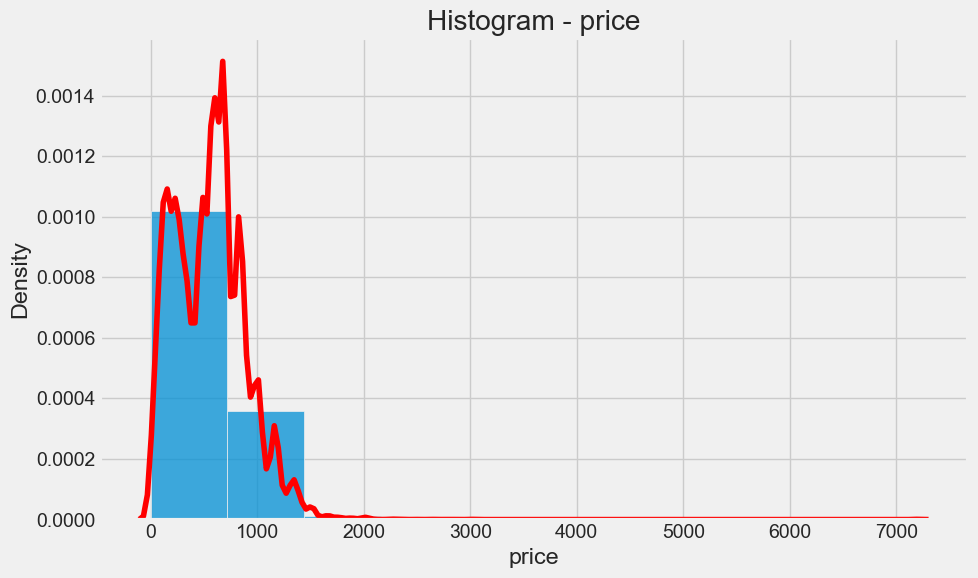

Skewness of price:  1.310189697017196
Kurtosis of price:  17.52860686103324
Outliers in price:  633



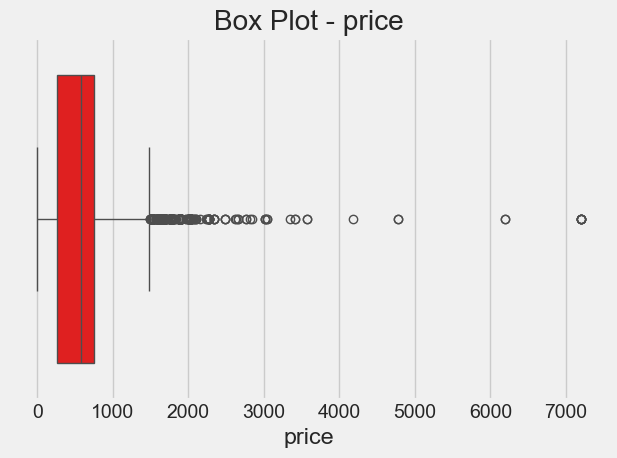

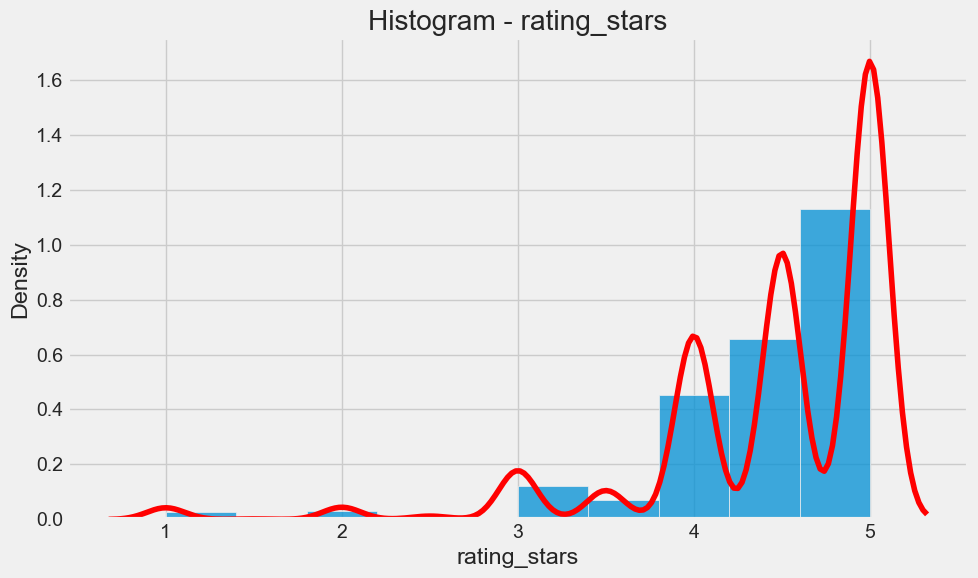

Skewness of rating_stars:  -2.115596084306235
Kurtosis of rating_stars:  8.82941307395609
Outliers in rating_stars:  333



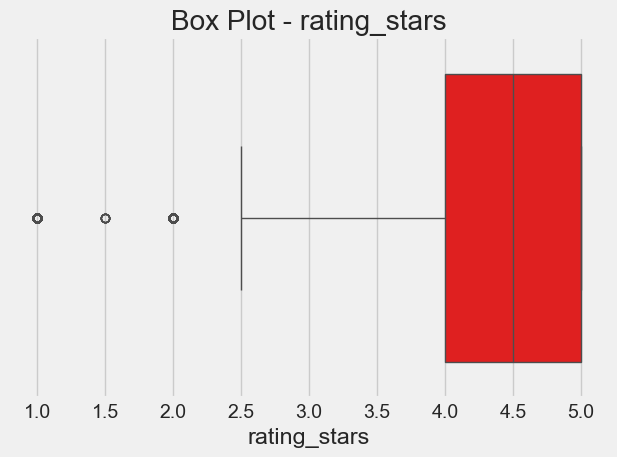

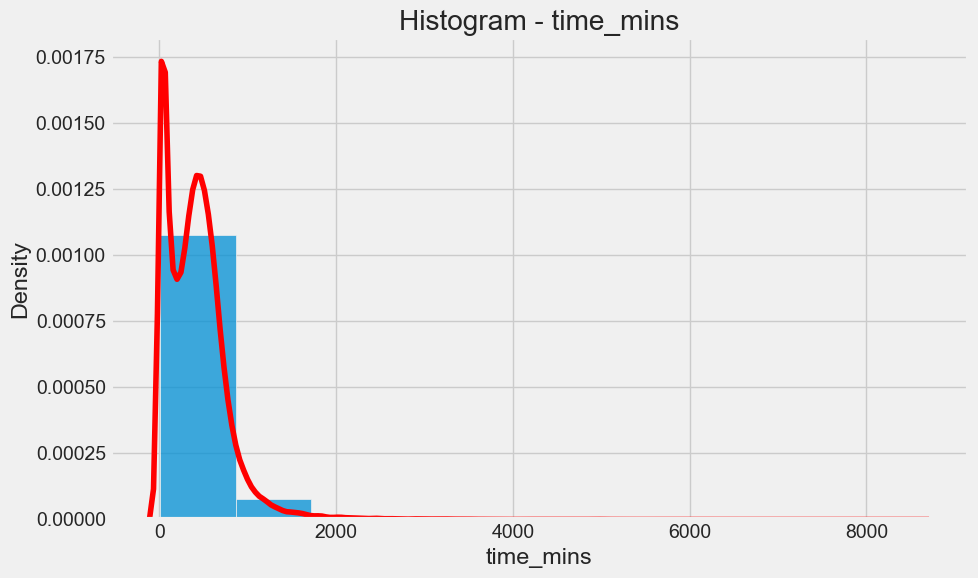

Skewness of time_mins:  2.92725219205431
Kurtosis of time_mins:  28.081909350040302
Outliers in time_mins:  1905



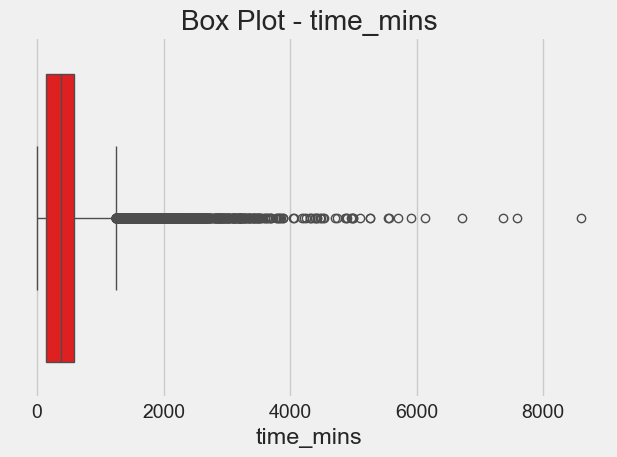

In [22]:
for col in numerical_columns:
        univariate_num(data, target_col=col, bin=10, figsize=(10, 6), kde_color='red', box_color='red')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <ul>
            <li>
                <b>price:</b> The price distribution is asymmetric with a right skewness of 1.31 and a kurtosis of 17.52. There are 633 outliers in the price data, indicating a relatively not normal and not consistent distribution across the dataset.
            </li>
            <li>
                <b>rating_stars:</b> The rating_stars distribution also shows a negative skewness of -2.11 and a kurtosis of 8.82, which is not normal distribution. However, there are 333 outliers in the rating_stars data, suggesting the presence of individuals with significantly lower rating_stars values compared to the rest of the population.
            </li>
            <li>
                <b>time_mins:</b> The time_mins distribution exhibits a notable highly positive skewness of 2.92 and a kurtosis of 28.08, indicating a long right tail and a peak higher than a normal distribution. The presence of 19 outliers suggests a substantial number of individuals with unusually high time_mins readings, which could be a point of concern for price.
            </li>
        </ul>
    </span>   
</div>


<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1.2 Univariate Analysis on Categorical Columns
            </span>   
        </font>    
</h3>

In [9]:
def univariate_cat(col, bar_head=2, pie_head=2, colors=['r', 'b', 'g', 'y', 'm', 'c', 'k'], figsize=(10, 6)):
    # Get value counts
    value_counts = col.value_counts()
    top_bar = value_counts.head(bar_head)
    top_pie = value_counts.head(pie_head)

    # Adjust colors if there are more categories than predefined colors
    if len(top_bar) > len(colors):
        colors = sns.color_palette("hsv", len(top_bar))
    
    # Convert value counts to DataFrame for easier handling with hue
    top_bar_df = top_bar.reset_index()
    top_bar_df.columns = [col.name, 'counts']
    
    # Bar plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=top_bar_df, x=col.name, y='counts', hue=col.name, palette=colors[:len(top_bar)], dodge=False, legend=False)
    
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
        
    plt.title(f'Bar plot - {col.name}')
    plt.xlabel(col.name)
    plt.ylabel('Frequency')
    plt.show()

    # Pie plot
    top_pie.plot(kind='pie', 
                 autopct='%0.1f%%', 
                 colors=colors[:len(top_pie)], 
                 figsize=figsize, 
                 legend=True)
    
    plt.title(f'Pie plot - {col.name}')
    plt.ylabel('')
    plt.show()
    print("\n" * 3)

    return 

In [24]:
categorical_columns

['language', 'rating_indiactor']

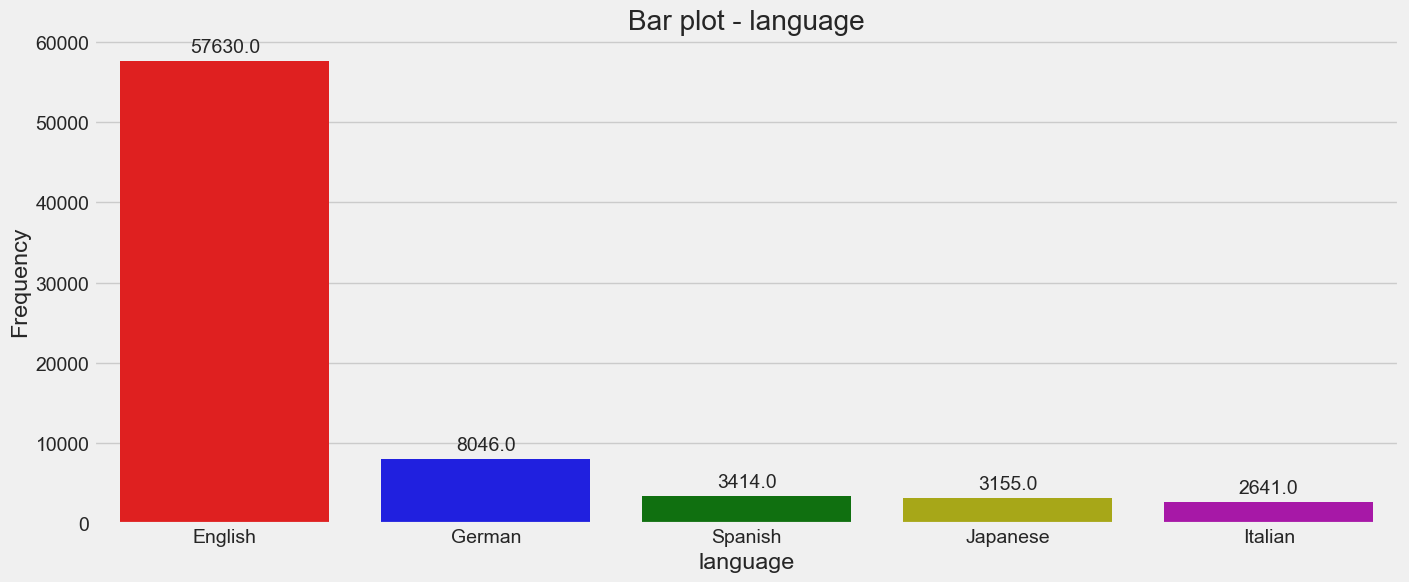

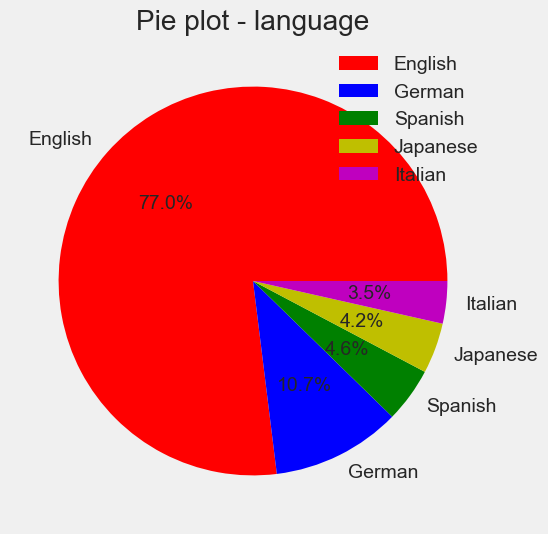

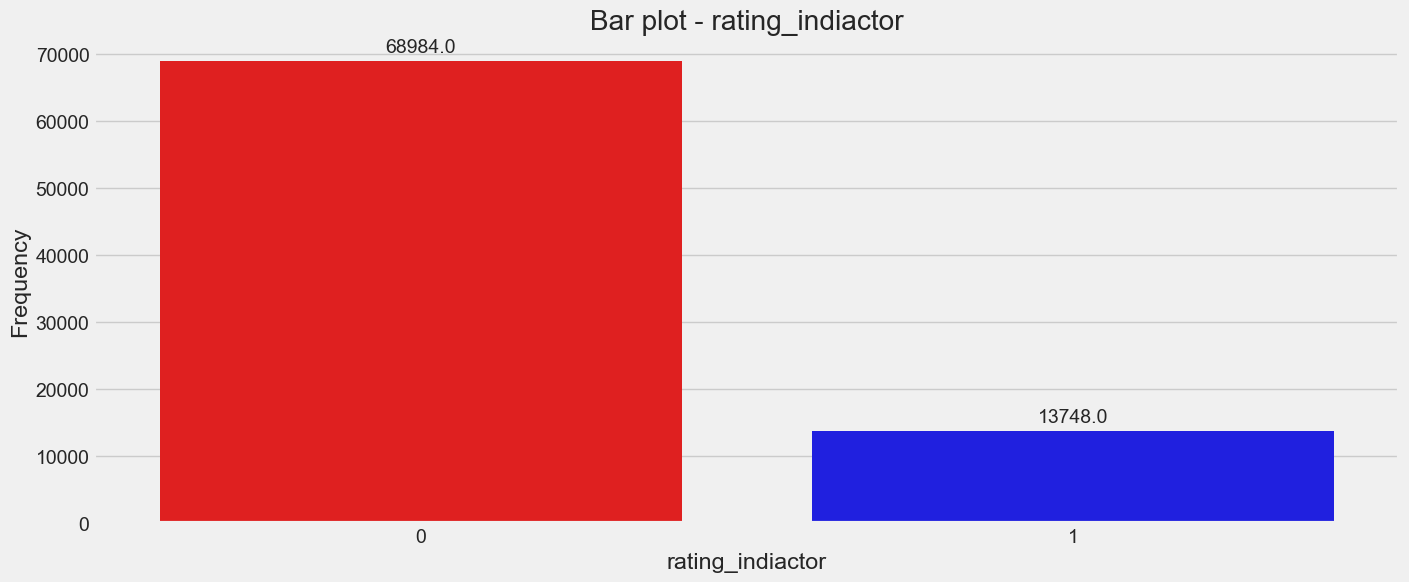

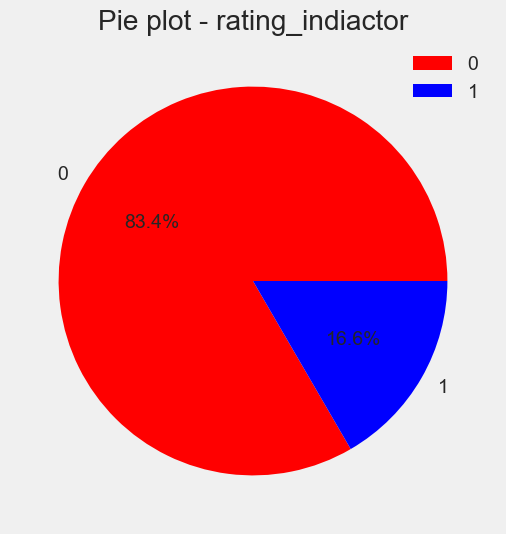

In [27]:
for col in categorical_columns:
    univariate_cat(data[col], bar_head=5, pie_head=5, figsize=(15, 6))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>language:</b> Out of top 5 languages, English (70%) is the most common language used by 1000+ people.
            </li>
            <li>
                <b>rating_indicator:</b> 83.4% of the audience not rated the content as positive but only 16% rated it as positive.
            </li>
        </ul>
    </span>
</div>


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Action:</b><br>
        <ul>
            <li><b>Imbalanced Columns:</b> rating_indicator is a imbalanced column may be we can drop it in future steps.</li>
            <li><b> language:</b> Merged niche languages into "other languages".</li>
        </ul>
    </span>
</div>


In [10]:
X = data['language'].value_counts().head(11).index.to_list()
data['language'] = data['language'].apply(lambda x: x if x in X else 'Others')

In [11]:
# Define a function to check if a column is imbalanced
def is_imbalanced(col, threshold=0.8):
    top_value_ratio = col.value_counts(normalize=True).max()
    return top_value_ratio >= threshold

# Identify imbalanced columns
imbalanced_columns = [col for col in data.columns if is_imbalanced(data[col])]

print("Imbalanced columns:", imbalanced_columns)

Imbalanced columns: ['rating_indiactor']


In [12]:
for name in imbalanced_columns:
    categorical_columns.remove(name)

<a id="univariate"></a>
<h2>   
      <font color = orange >
            <span style='font-family:Georgia'>
            4.2 Bivariate Analysis
            </span>   
        </font>    
</h2>

<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2.1 Numerical Vs Numerical
            </span>   
        </font>    
</h3>

In [13]:
def numerical_vs_numerical(data, num_col1, num_col2='price', figsize=(18, 12)):

    # Set up the subplot structure
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Scatter plot with Plotly
    fig1 = px.scatter(data, x=num_col1, y=num_col2, color='price',
                     title=f'Scatter Plot: {num_col1} vs {num_col2}',
                     labels={num_col1: num_col1, num_col2: num_col2})
    fig1.show()

    # Line plot with Seaborn
    sns.lineplot(x=data[num_col1], y=data[num_col2], ax=axes[0])
    axes[0].set_title(f'Line Plot: {num_col1} vs {num_col2}')
    axes[0].set_xlabel(num_col1)
    axes[0].set_ylabel(num_col2)


    # Joint plot with regression
    sns.regplot(x=num_col1, y=num_col2, data=data, ax=axes[1], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    axes[1].set_title(f'Joint Plot: {num_col1} vs {num_col2}')
    axes[1].set_xlabel(num_col1)
    axes[1].set_ylabel(num_col2)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation coefficient
    corr = data[[num_col1, num_col2]].corr().iloc[0, 1]

    print(f'Correlation between {num_col1} and {num_col2}: {corr:.2f}')
    print('\n' * 3)

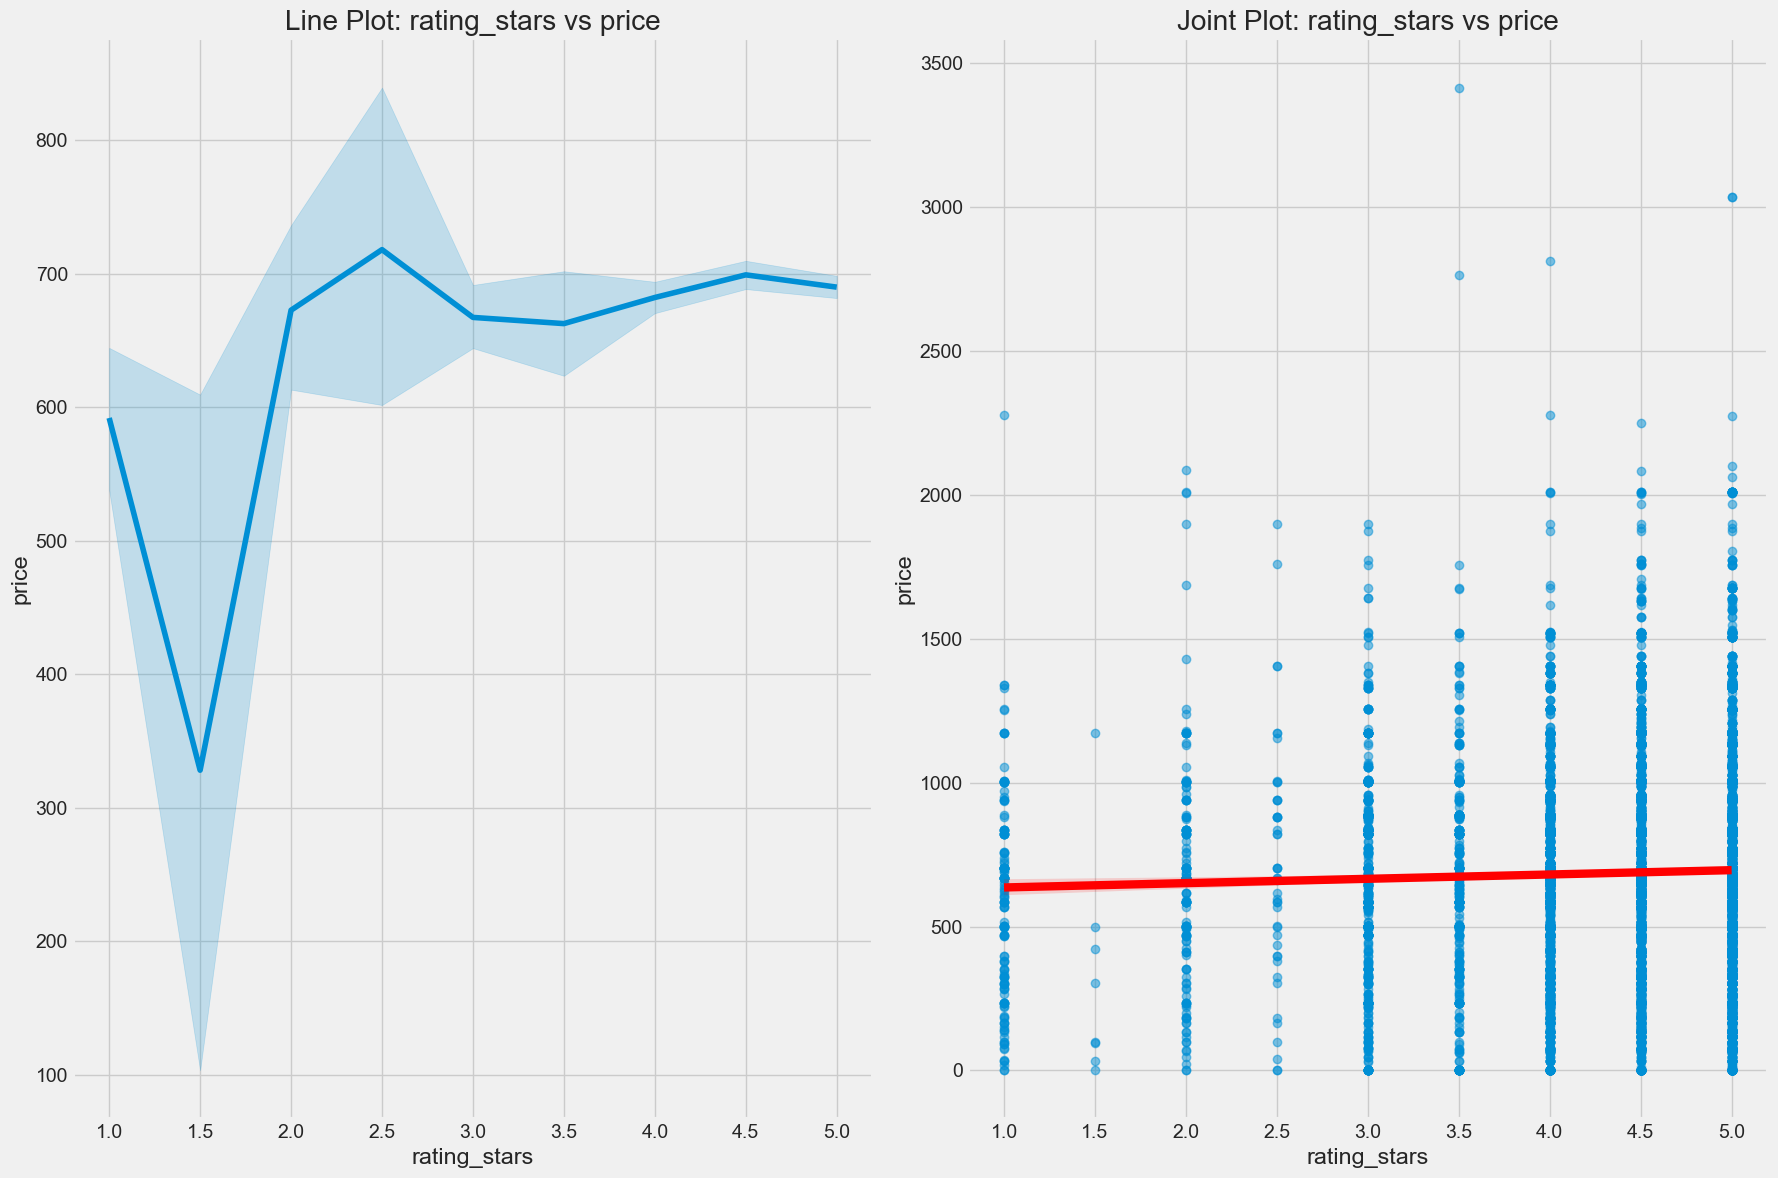

Correlation between rating_stars and price: 0.03






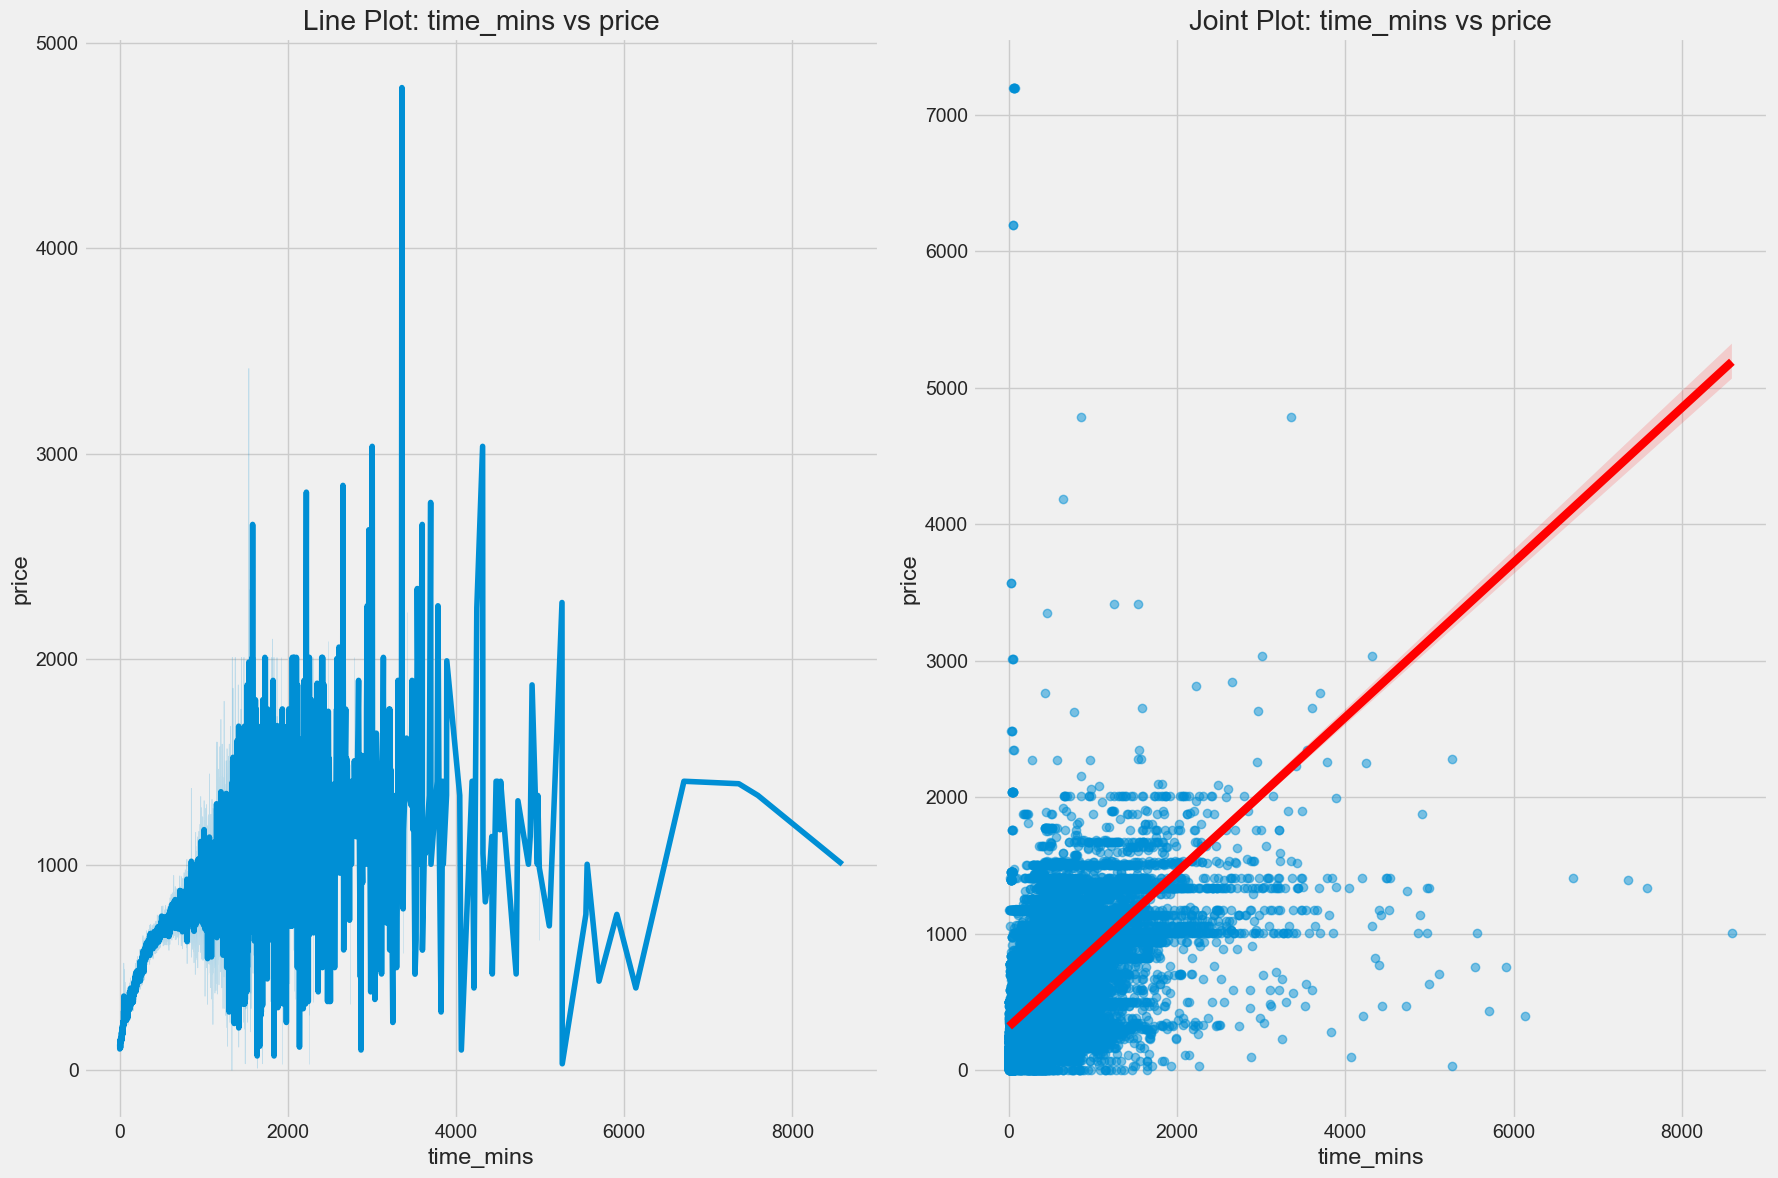

Correlation between time_mins and price: 0.61






In [49]:
for num_col in numerical_columns:
    if num_col != 'price':
        numerical_vs_numerical(data, num_col1=num_col, num_col2='price', figsize=(18, 12))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Correlation between rating_stars and price:</b> The correlation coefficient between rating_stars and price is 0.03, indicating a very weak positive relationship. This suggests that rating_stars is not a significant predictor for the likelihood of filing a price in this dataset. Further analysis may be needed to understand if specific rating groups show different price behaviors.
            </li>
            <li>
                <b>Correlation between time_mins and price:</b> With a correlation coefficient of 0.61, there is a mild positive relationship between time_mins and price. This implies that contents with higher time_mins tend to file more prices, although the relationship is not strong. It highlights the importance of considering time_mins as a potential factor when predicting claims, especially when combined with other columns.
            </li>
        </ul>
    </span>
</div>


<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2.2 Numerical Vs Categorical
            </span>   
        </font>    
</h3>

In [14]:
def numerical_vs_categorical(data, num_col, cat_col, figsize=(18, 12),colors=['r', 'b', 'g', 'y', 'm', 'c', 'k'], agg = 'count', hue = None):
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    cols = data[cat_col].unique()
    if len(cols) > len(colors):
        colors = sns.color_palette("hsv", len(cols))

    # Box plot
    sns.boxplot(x=cat_col, y=num_col, data=data, ax=axes[0,0], hue = cat_col, palette=colors[:len(cols)], legend=False)
    axes[0, 0].set_title(f'Box Plot: {num_col} by {cat_col}')
    axes[0, 0].set_xlabel(cat_col)
    axes[0, 0].set_ylabel(num_col)
    
    # Violin plot
    sns.violinplot(x=cat_col, y=num_col, data=data, ax=axes[0, 1], hue = cat_col, palette=colors[:len(cols)], legend=False)
    axes[0, 1].set_title(f'Violin Plot: {num_col} by {cat_col}')
    axes[0, 1].set_xlabel(cat_col)
    axes[0, 1].set_ylabel(num_col)


    # Bar plot
    means = data.groupby(by=[cat_col])[num_col].agg(func = [agg]).reset_index()
    ax = sns.barplot(x=cat_col, y=agg, data=means, ax=axes[1, 0] , hue = cat_col, palette=colors[:len(cols)], legend=False)
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
        
    axes[1, 0].set_title(f'Bar Plot: Mean {num_col} by {cat_col}')
    axes[1, 0].set_xlabel(cat_col)
    axes[1, 0].set_ylabel(f'{agg} {num_col}')
    
    # swarm plot
    sns.stripplot(x=cat_col, y=num_col, data=data, ax=axes[1, 1], hue = cat_col , palette=colors[:len(cols)], legend=False)
    axes[1, 1].set_title(f'Swarm Plot: {num_col} by {cat_col}')
    axes[1, 1].set_xlabel(cat_col)
    axes[1, 1].set_ylabel(num_col)
    plt.tight_layout()
    plt.show()
    
    print('\n'*4)

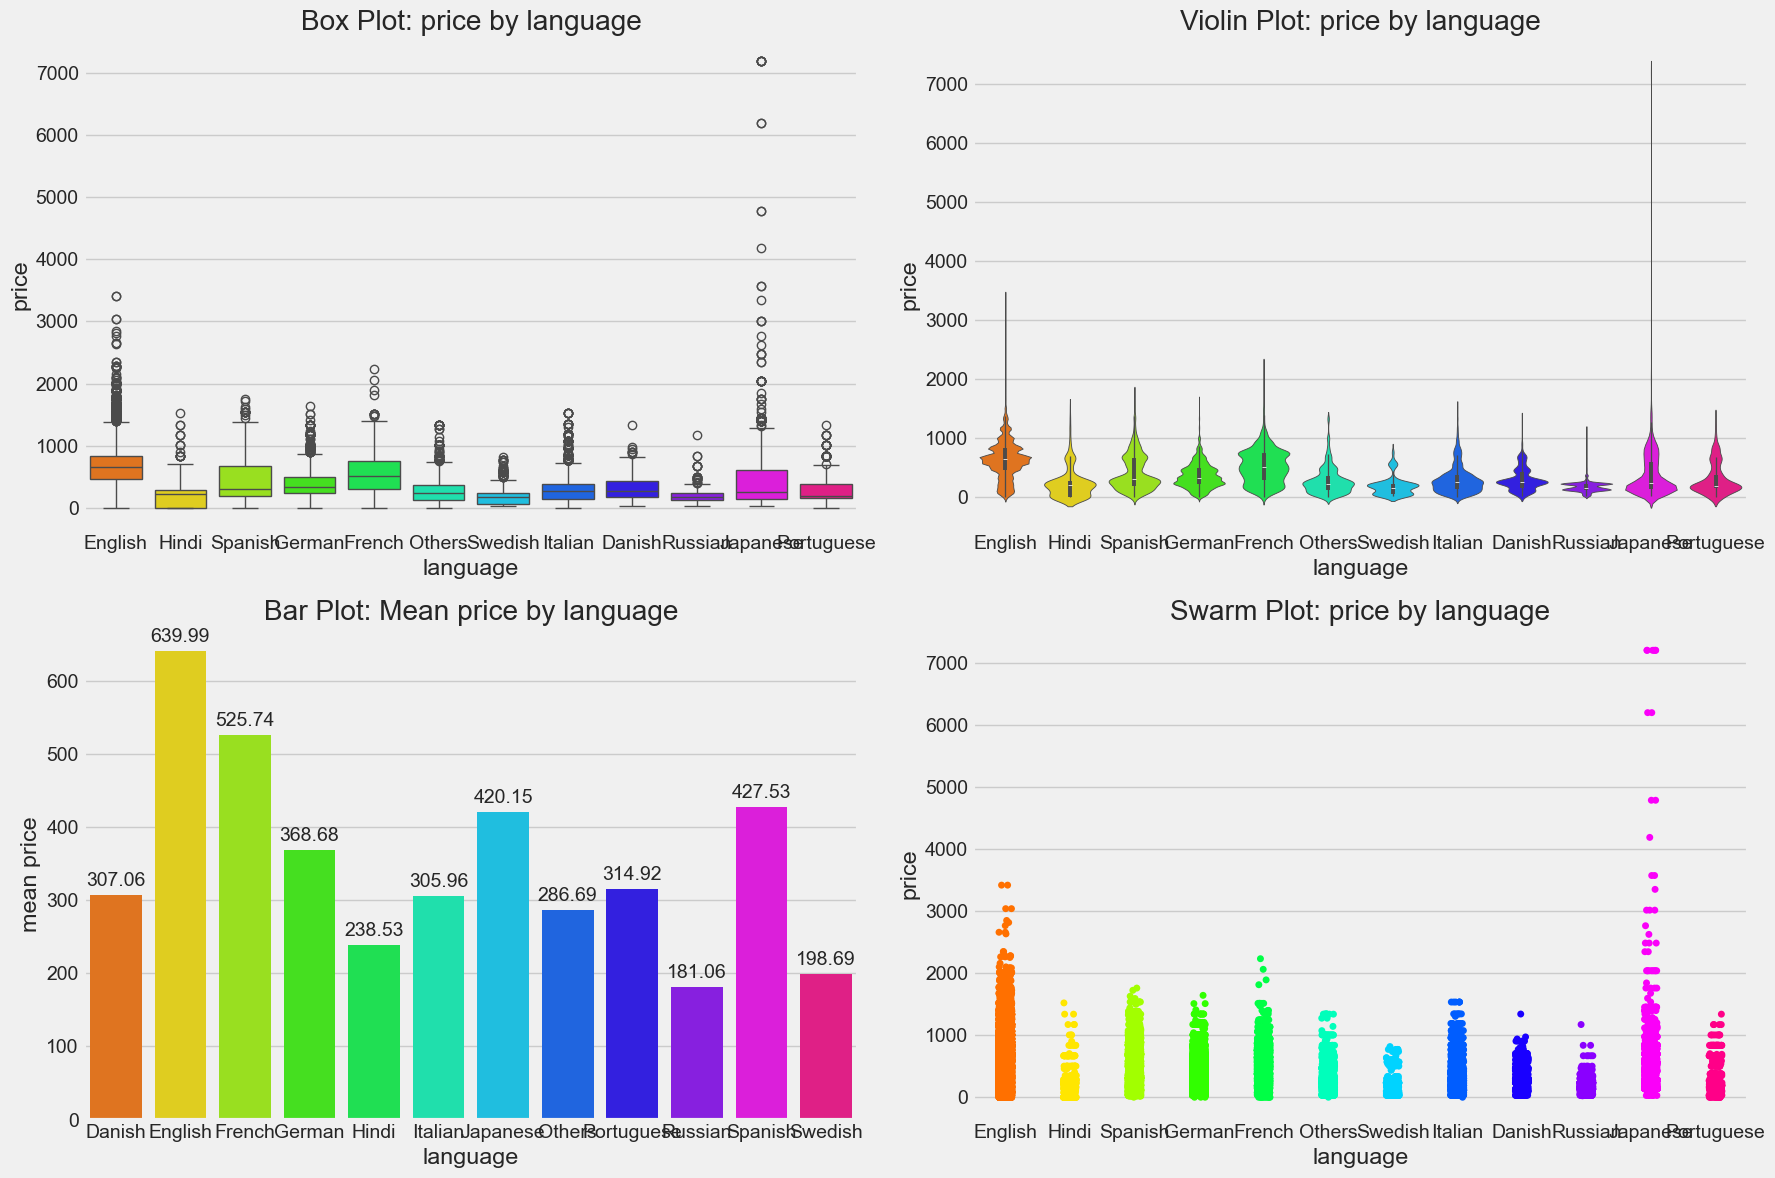

In [51]:
for cat_col in categorical_columns:
    numerical_vs_categorical(data, num_col='price', cat_col=cat_col, agg = 'mean', figsize=(18, 12))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Price by language:</b> The mean price amount for English (640) is higher than other languages. This indicates that English tend to file higher prices compared to other languages. language could be a significant factor to consider in predicting price amounts.
            </li>
        </ul>
    </span>
</div>


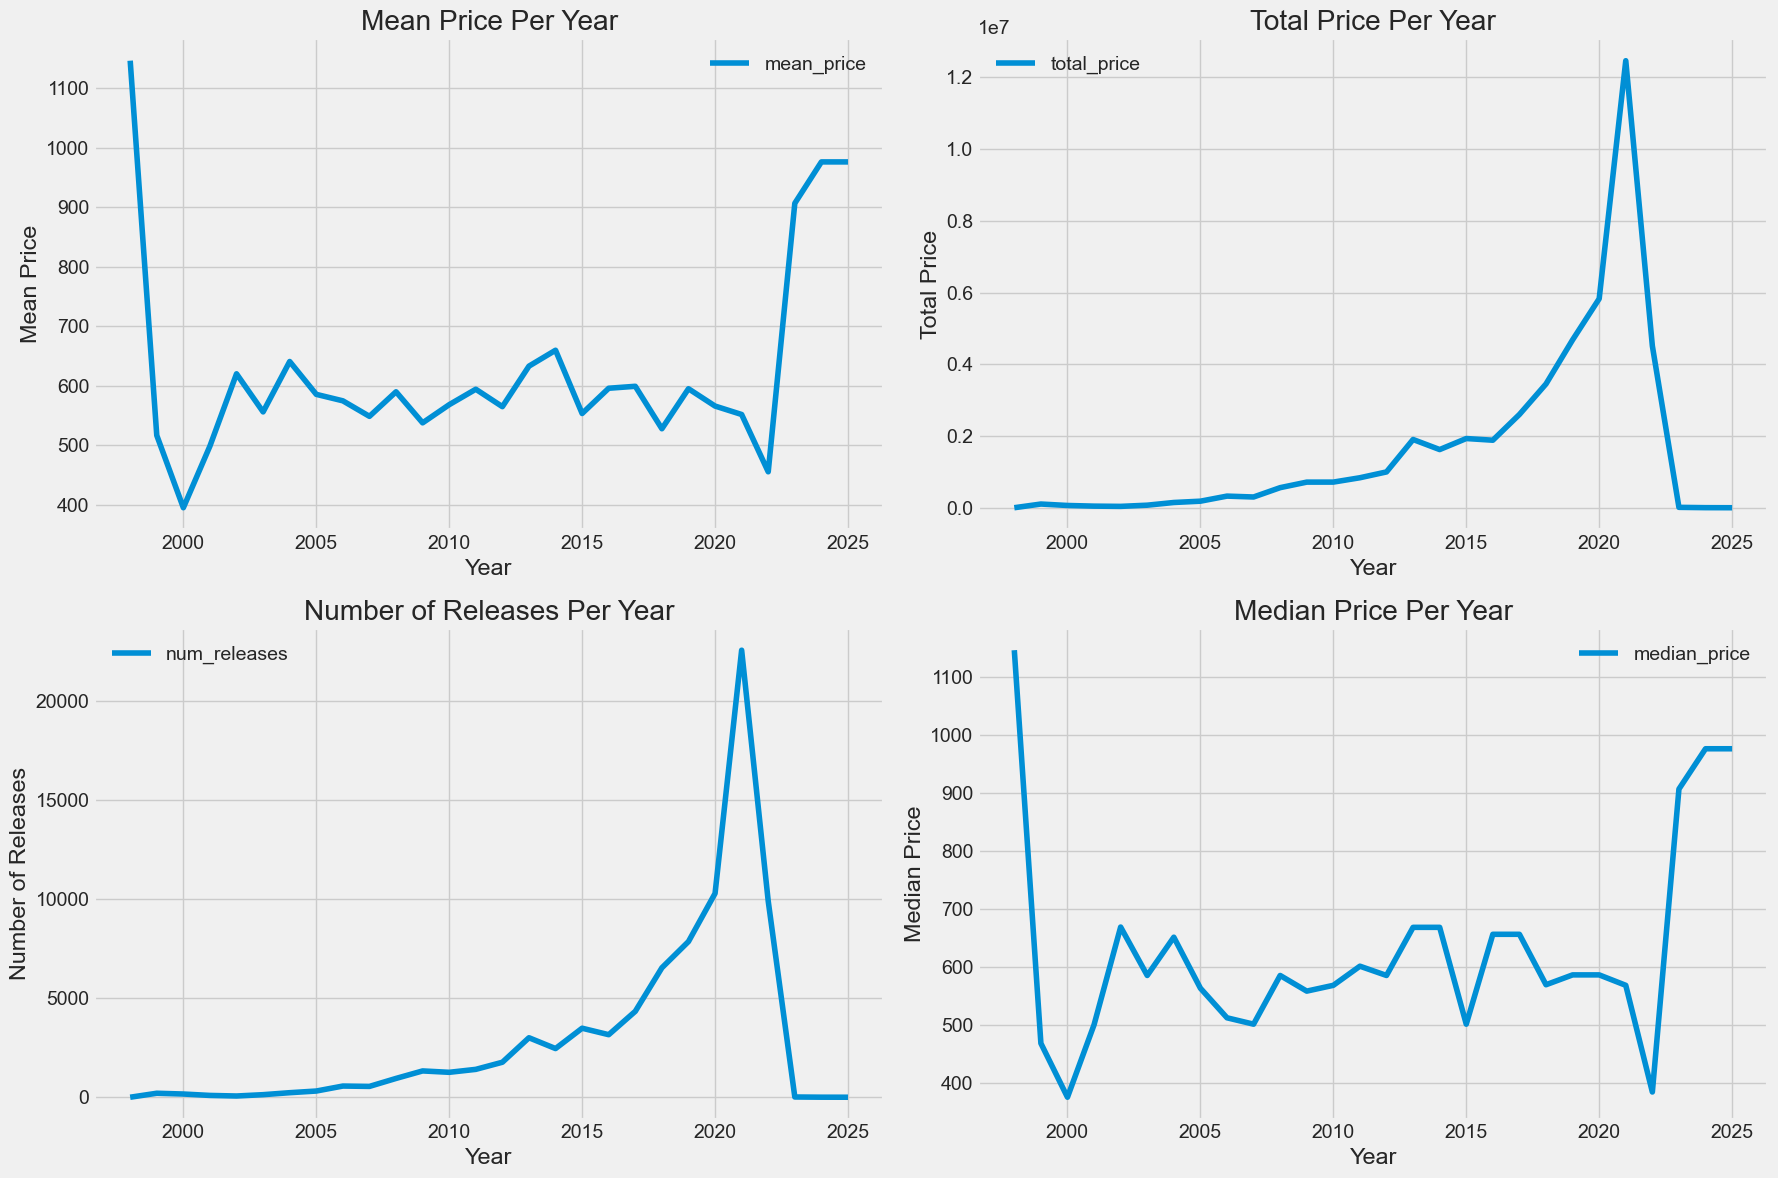

In [17]:

df1 = data.copy()

# Step 2: Set the 'releasedate' column as the index
df1.set_index('releasedate', inplace=True)

# Step 3: Prepare the data for each plot
year = data['releasedate'].dt.year

# Mean price per year
mean_price = data.groupby(year)['price'].mean().reset_index()
mean_price.columns = ['releasedate', 'mean_price']

# Total price per year
total_price = data.groupby(year)['price'].sum().reset_index()
total_price.columns = ['releasedate', 'total_price']

# Number of releases per year
num_releases = data.groupby(year).size().reset_index(name='num_releases')

# Median price per year
median_price = data.groupby(year)['price'].median().reset_index()
median_price.columns = ['releasedate', 'median_price']

# Step 4: Plot the data
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Mean price per year
mean_price.plot(x='releasedate', y='mean_price', ax=axs[0, 0])
axs[0, 0].set_title('Mean Price Per Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Mean Price')

# Total price per year
total_price.plot(x='releasedate', y='total_price', ax=axs[0, 1])
axs[0, 1].set_title('Total Price Per Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Total Price')

# Number of releases per year
num_releases.plot(x='releasedate', y='num_releases', ax=axs[1, 0])
axs[1, 0].set_title('Number of Releases Per Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of Releases')

# Median price per year
median_price.plot(x='releasedate', y='median_price', ax=axs[1, 1])
axs[1, 1].set_title('Median Price Per Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Median Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Mean Price Per Year:</b> The mean price shows significant fluctuations over the years, with an exceptionally high value around the year 2000, followed by a drop. The mean price stabilizes between 400 and 700 for many years, but shows a sharp increase starting around 2020, peaking above 1100 by 2023.
            </li>
            <li>
                <b>Total Price Per Year:</b> The total price exhibits a steady increase from 2000 to 2015, followed by a more rapid rise. A notable spike occurs around 2020, reaching above 1.2e7, indicating a large number of high-priced items released that year. However, there is a sudden drop post-2020.
            </li>
            <li>
                <b>Number of Releases Per Year:</b> The number of releases grows steadily from 2000 to 2015, with a significant acceleration post-2015. The peak around 2020 indicates over 20,000 releases in that year, followed by a sharp decline, suggesting a possible market saturation or other external factors affecting the number of releases.
            </li>
            <li>
                <b>Median Price Per Year:</b> The median price trend closely follows the mean price trend, with high volatility around the year 2000 and a subsequent drop. The prices stabilize for a long period but show a marked increase around 2020, peaking above 1100 by 2023, indicating that the increase in mean price was not driven by a few high-priced items but was a broader market trend.
            </li>
        </ul>
    </span>
</div>

In [31]:
year = data['releasedate'].dt.year

# Create a pivot table with mean price by language and year
pivot_data = data.pivot_table(index=year, columns='language', values='price', aggfunc='mean')

# Create a line plot using Plotly Express
fig = px.line(
    pivot_data, 
    x=pivot_data.index, 
    y=pivot_data.columns, 
    title='Mean Price by Language and Year',
    labels={'x': 'Year', 'value': 'Mean Price', 'variable': 'Language'}
)

# Customize the plot's appearance
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Mean Price',
    legend_title='Language',
    template='plotly_dark',  # Choose a suitable design template
    width=1000,
    height=600
)

# Show the plot
fig.show()

<div class="alert alert-block alert-success" style="background-color: #E2F4E1;">
    <span style='font-family: Georgia;'>
        <a id="infer"></a>
        <h2><font color="green">Final Inference</font></h2>
        <p>
            <span style='font-family:Georgia'>
                Our Exploratory Data Analysis of the Audible dataset has yielded several insightful findings that shed light on the factors influencing price amounts:
            </span>
        </p>
        <ul>
            <li><span style='font-family:Georgia'><b>Price Distribution:</b> The price distribution is asymmetric with a right skewness of 1.31 and a kurtosis of 17.52. There are 633 outliers, indicating a relatively not normal and inconsistent distribution across the dataset.</span></li>
            <li><span style='font-family:Georgia'><b>Rating Stars:</b> The distribution of rating_stars shows a negative skewness of -2.11 and a kurtosis of 8.82, indicating a non-normal distribution with 333 outliers. This suggests a significant presence of lower rating values.</span></li>
            <li><span style='font-family:Georgia'><b>Listening Time:</b> The time_mins distribution has a highly positive skewness of 2.92 and a kurtosis of 28.08, indicating a long right tail and a peak higher than a normal distribution. The presence of 19 outliers suggests a number of unusually high listening times.</span></li>
            <li><span style='font-family:Georgia'><b>Language Distribution:</b> English is the predominant language, used by 70% of the dataset. Out of the top 5 languages, it is the most common, used by over 1000 individuals.</span></li>
            <li><span style='font-family:Georgia'><b>Rating Indicator:</b> Only 16% of the audience rated the content positively, with 83.4% not giving a positive rating.</span></li>
            <li><span style='font-family:Georgia'><b>Correlation Analysis:</b> 
                <ul>
                    <li><span style='font-family:Georgia'><b>Rating Stars and Price:</b> The correlation coefficient between rating_stars and price is 0.03, indicating a very weak positive relationship.</span></li>
                    <li><span style='font-family:Georgia'><b>Time Mins and Price:</b> The correlation coefficient between time_mins and price is 0.61, indicating a mild positive relationship.</span></li>
                </ul>
            </span></li>
            <li><span style='font-family:Georgia'><b>Price by Language:</b> The mean price for English content is 640, higher than for other languages, indicating that English content tends to have higher prices.</span></li>
            <li><span style='font-family:Georgia'><b>Yearly Trends:</b> 
                <ul>
                    <li><span style='font-family:Georgia'><b>Mean Price Per Year:</b> Significant fluctuations with a high around 2000, stabilizing, then sharply increasing around 2020.</span></li>
                    <li><span style='font-family:Georgia'><b>Total Price Per Year:</b> Steady increase from 2000 to 2015, a rapid rise, and a notable spike around 2020, followed by a drop.</span></li>
                    <li><span style='font-family:Georgia'><b>Number of Releases Per Year:</b> Steady growth from 2000 to 2015, significant acceleration post-2015, peaking around 2020, then declining.</span></li>
                    <li><span style='font-family:Georgia'><b>Median Price Per Year:</b> Trends closely follow mean price, with high volatility around 2000, stabilizing, then increasing around 2020.</span></li>
                </ul>
            </span></li>
        </ul>
        <h3><font color="green">Conclusion and Best Features for Future Model Prediction</font></h3>
        <p>
            <span style='font-family:Georgia'>
                Through this in-depth EDA, we've identified several key features that can be instrumental for future predictive models aimed at understanding and predicting the price of audio content:
            </span>
        </p>
        <ul>
            <li><span style='font-family:Georgia'><b>Language:</b> Significant for predicting price amounts due to differences in mean prices among languages.</span></li>
            <li><span style='font-family:Georgia'><b>Rating Stars:</b> While the correlation with price is weak, it provides insight into user preferences.</span></li>
            <li><span style='font-family:Georgia'><b>Time Mins:</b> Shows a mild positive relationship with price, important for understanding the value of longer content.</span></li>
            <li><span style='font-family:Georgia'><b>Release Year:</b> Provides historical price trends, crucial for temporal analysis.</span></li>
        </ul>
        <p>
            <span style='font-family:Georgia'>
                By incorporating these features into predictive models, we can develop a robust understanding of the factors influencing price amounts. This analysis not only helps grasp historical data nuances but also improves our ability to build accurate predictive models for price prediction in the future.
            </span>
        </p>
    </span>
</div>